# Figure 2 for ROB paper

env : plot_python

## Import library

In [2]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['svg.fonttype'] = 'none'  # Keep text as text (not paths)
import re
from scipy.stats import mannwhitneyu
from pathlib import Path
import pandas as pd
import seaborn as sns
from varname import nameof 
from scipy.stats import pearsonr

### plotting 
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'  # Keep text as text (not paths)


## Session info
# import session_info
# session_info.show()

## READ IN DATA

In [3]:
## RPC cohort mapped on chm13 
rpc_chm13 = pd.read_csv("/vf/users/RPC_CHM13/inova.copynum_dip.4187.txt", sep="\t",header=0)
rpc_chm13.head(2)

,Sample,Sex,DJ,5S,rDNA,rDNA18S,Chr13_PHR,Chr13_PHR_arm1,Chr13_PHR_arm2
0,102-00001-01,XX,9.89,151.26,434.05,361.36,4.57,4.78,4.52
1,102-00001-02,XY,11.00,166.17,548.88,465.20,4.64,4.76,4.70


In [4]:
sample_list_8 = rpc_chm13.loc[rpc_chm13['DJ'] < 8.8, "Sample"]
sample_list_8 = sample_list_8.str.replace("-0[123]$","", regex=True)
print(sample_list_8)

pattern = '|'.join(sample_list_8)
rpc_chm13[rpc_chm13['Sample'].str.contains(pattern, regex=True)]

1425    102-00161
2555    102-01413
2590    102-01436
2592    102-01436
Name: Sample, dtype: object


,Sample,Sex,DJ,5S,rDNA,rDNA18S,Chr13_PHR,Chr13_PHR_arm1,Chr13_PHR_arm2
1425,102-00161-01,XX,8.16,112.06,386.62,314.39,3.79,3.87,3.87
1426,102-00161-02,XY,10.09,77.95,433.76,343.85,4.76,4.85,4.90
1427,102-00161-03,XY,8.88,105.28,415.64,324.00,4.66,4.71,4.84
2554,102-01413-01,XX,10.20,172.41,338.33,370.00,5.74,6.00,5.69
2555,102-01413-02,XY,8.04,82.58,229.60,254.43,4.19,4.04,4.73
2556,102-01413-03a,XX,9.10,103.80,357.67,374.80,5.40,5.40,5.85
2557,102-01413-03b,XX,8.95,92.90,334.77,344.59,5.36,5.31,5.77
2590,102-01436-01,XX,8.05,164.44,254.72,274.75,4.66,4.77,4.72
2591,102-01436-02,XY,9.04,181.35,325.57,344.57,4.66,4.85,4.61
2592,102-01436-03,XX,8.04,167.69,316.19,319.78,5.71,5.80,5.85


In [5]:
pattern = "-01$|-02$"
rpc_chm13_parents = rpc_chm13[rpc_chm13['Sample'].str.contains(pattern, regex=True)]
rpc_chm13_parents['group'] = "parents"

/tmp/ipykernel_2229511/817677977.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rpc_chm13_parents['group'] = "parents"


In [6]:
rpc_chm13['group'] = "all"

rpc_chm13_mrg = pd.concat([rpc_chm13, rpc_chm13_parents])

In [7]:
rpc_chm13_mrg['Chr13_PHR_arm1'].min()

2.93

### Figure 3A - Vlnplot of RPC cohort mapped on the CHM13

In [8]:
sns.__version__ 

'0.13.2'

/tmp/ipykernel_2229511/1774620604.py:76: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/tmp/ipykernel_2229511/1774620604.py:76: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/tmp/ipykernel_2229511/1774620604.py:76: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


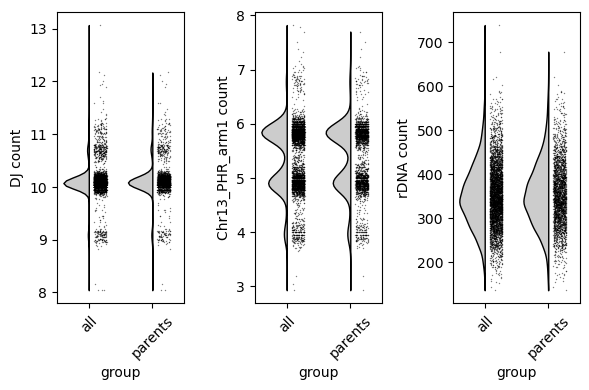

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Targets
targetlist = ["DJ", "Chr13_PHR_arm1", "rDNA"]

x = "group"

n_targets = len(targetlist)
fig, axes = plt.subplots(1, n_targets, figsize=(6, 4))

# Ensure axes iterable if single panel
if n_targets == 1:
    axes = [axes]

for idx, target in enumerate(targetlist):

    if target not in rpc_chm13_mrg.columns:
        print(f"Warning: {target} not found in dataframe, skipping...")
        continue

    ax = axes[idx]

    # ----------------------
    # FULL VIOLIN
    # ----------------------
    vp = sns.violinplot(
        data=rpc_chm13_mrg,
        x=x,
        y=target,
        inner=None,
        linewidth=1,
        cut=0,
        ax=ax,
        zorder=1
    )

    # ----------------------
    # CLIP TO LEFT HALF
    # ----------------------
    for violin in vp.collections:
        for path in violin.get_paths():
            vertices = path.vertices
            x_center = np.mean(vertices[:, 0])
            vertices[:, 0] = np.minimum(vertices[:, 0], x_center)

        violin.set_facecolor("#cccccc")
        violin.set_edgecolor("black")
        violin.set_alpha(1)

    # ----------------------
    # STRIPPLOT (DOTS)
    # ----------------------
    sp = sns.stripplot(
        data=rpc_chm13_mrg,
        x=x,
        y=target,
        color="black",
        alpha=0.5,
        size=1,
        jitter=True,
        ax=ax,
        zorder=2
    )

    # Shift dots slightly to right
    for collection in sp.collections:
        offsets = collection.get_offsets()
        collection.set_offsets(offsets + np.array([0.18, 0]))

    # ----------------------
    # LABELS
    # ----------------------
    ax.set_ylabel(f"{target} count")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.savefig("../figures/RPC_chm13_Vlnplot.pdf", bbox_inches="tight")
plt.show()
plt.close()

### Figure 3B - histogram of DJ and PHR copy number in RPC cohort

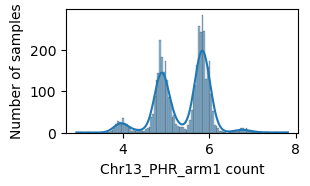

In [17]:
plt.figure(figsize=(3, 1.6))

target = "Chr13_PHR_arm1"
sns.histplot(
    rpc_chm13[target],
    bins=120,
    # stat="density",
    kde=True
)

plt.xlabel(f"{target} count")
plt.ylabel("Number of samples")
# plt.title("Histogram + Density")
plt.savefig(f'../figures/RPC_{target}_density.pdf', bbox_inches='tight')
plt.show()
plt.close()

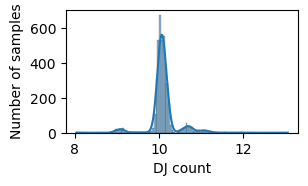

In [18]:
plt.figure(figsize=(3, 1.6))

target = "DJ"
sns.histplot(
    rpc_chm13[target],
    bins=120,
    # stat="density",
    kde=True
)

plt.xlabel(f"{target} count")
plt.ylabel("Number of samples")
# plt.title("Histogram + Density")
plt.savefig(f'../figures/RPC_{target}_density.pdf', bbox_inches='tight')
plt.show()
plt.close()

### Figure 3C - correlation between targets

In [6]:
tab = pd.melt(rpc_chm13, id_vars=['Sample', 'Sex','cohort'], value_vars=targetlist, var_name='Target', value_name='Count')
tab.head(2)

print(tab['Target'].unique())

NameError: name 'targetlist' is not defined

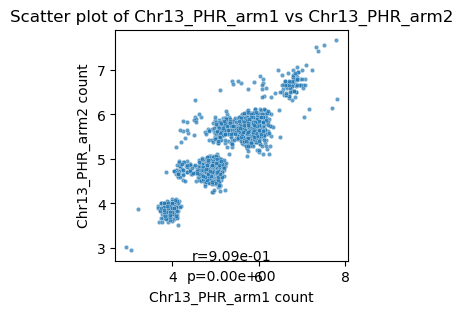

In [ ]:
from scipy.stats import pearsonr

fig, ax = plt.subplots(figsize=(3, 3))

x = "Chr13_PHR_arm1"
y = "Chr13_PHR_arm2"

sns.scatterplot(data=rpc_chm13, x=x, y=y, alpha=0.7, s=10, ax=ax)
stat , p = pearsonr(rpc_chm13[x], rpc_chm13[y])

text_x = (rpc_chm13[x].min() + rpc_chm13[x].max()) / 2
text_y = (rpc_chm13[y].min() + rpc_chm13[y].max()) / 4
text_y_2 = (rpc_chm13[y].min() + rpc_chm13[y].max()) / 4.8

ax.text(text_x, text_y, f'r={stat:.2e}', ha='center', va='bottom', fontsize=10)
ax.text(text_x, text_y_2, f'p={p:.2e}', ha='center', va='bottom', fontsize=10)

ax.set_xlabel(f'{x} count')
ax.set_ylabel(f'{y} count')
ax.set_title(f'Scatter plot of {x} vs {y}')
plt.savefig(f'../figures/RPC_{x}_vs_{y}_scatter.pdf', bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
rpc_chm13.head()

,Sample,Sex,DJ,5S,rDNA,rDNA18S,Chr13_PHR,Chr13_PHR_arm1,Chr13_PHR_arm2,cohort
0,102-00001-01,XX,9.89,151.26,434.05,361.36,4.57,4.78,4.52,RPC
1,102-00001-02,XY,11.00,166.17,548.88,465.20,4.64,4.76,4.70,RPC
2,102-00001-03,XX,9.94,154.00,467.70,421.70,4.70,4.88,4.70,RPC
3,102-00003-03,XY,10.00,147.31,446.74,400.28,4.57,4.74,4.68,RPC
4,102-00003-01,XX,9.95,193.70,476.75,431.30,4.55,4.75,4.60,RPC


/data/kimj75/anaconda3/envs/plot_python/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/kimj75/anaconda3/envs/plot_python/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/kimj75/anaconda3/envs/plot_python/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/kimj75/anaconda3/envs/plot_python/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

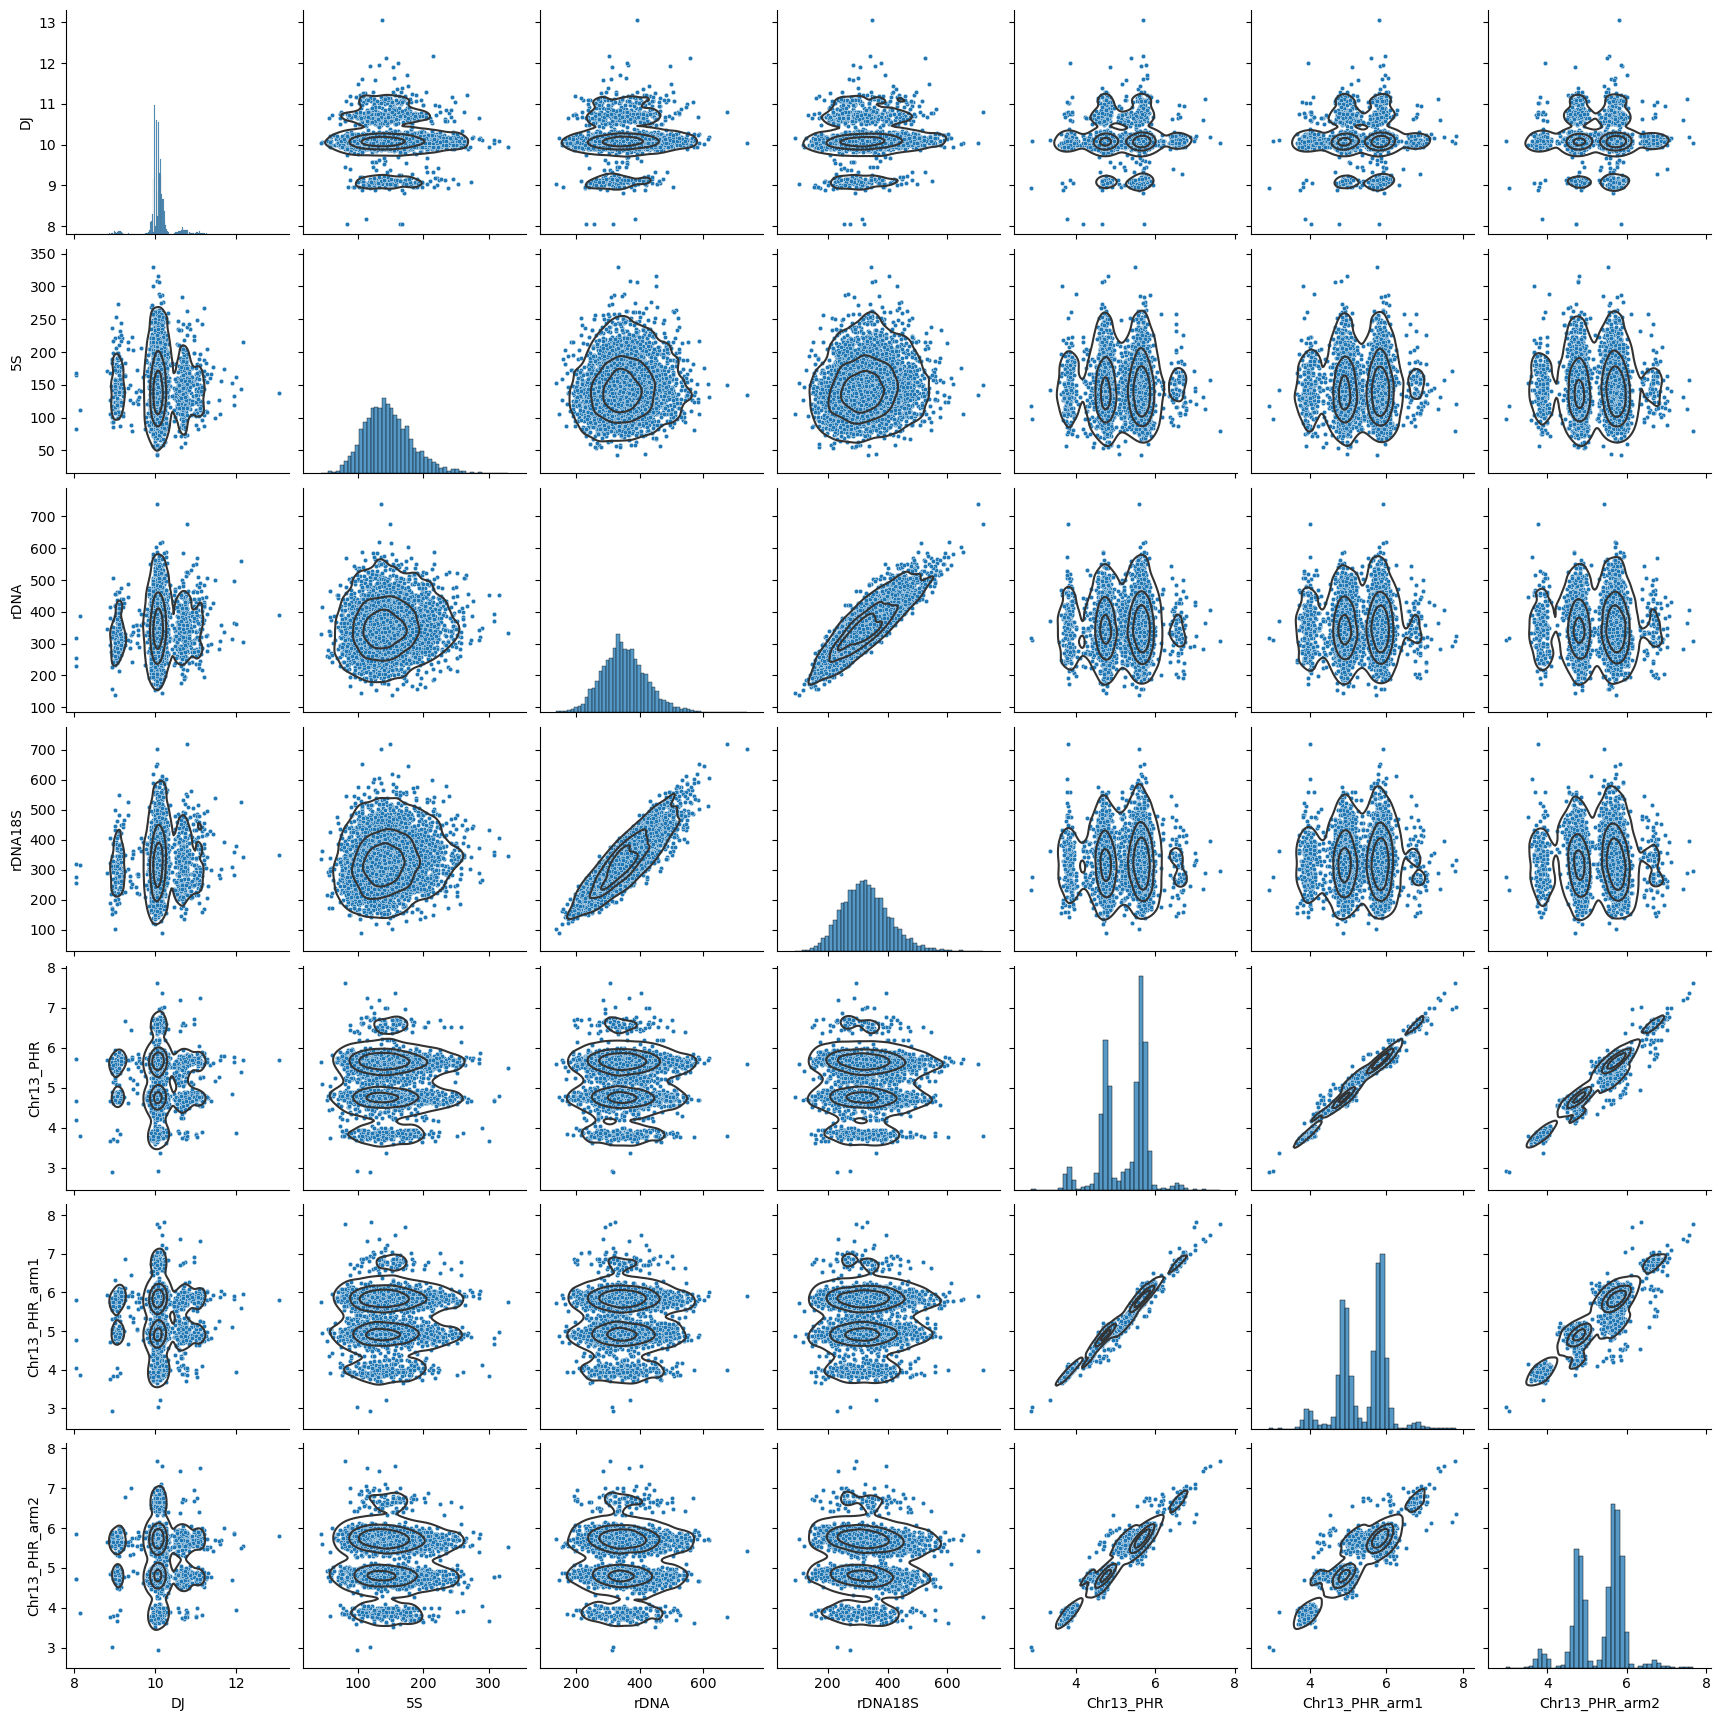

In [25]:
# g = sns.pairplot(rpc_chm13,corner=True,plot_kws={'s': 10}   # <-- change this value)
# g.map_lower(sns.kdeplot, levels=4, color="black", alpha  =0.5)
g = sns.pairplot(rpc_chm13,plot_kws={'s': 10})
g.map_lower(sns.kdeplot, levels=4, color=".2")
g.map_upper(sns.kdeplot, levels=4, color=".2")

plt.savefig(f'../figures/RPC_chm13_pairplot.all.pdf', bbox_inches='tight')
plt.show()
plt.close()

### Figure 3D - correlation between method (kmer, read depth, etc) and copy number estimation

In [10]:
kmer = "/vf/users/RPC_CHM13/kmer/DJ_counts.txt"
kmer_df = pd.read_csv(kmer, sep="\t", header=None, names=["Sample", "DJ_count", "background", 'Peak_Est'])
kmer_df.head(5)

,Sample,DJ_count,background,Peak_Est
0,102-00001-01,126,25,10.08000
1,102-00001-02,126,23,10.95650
2,102-00001-03,114,23,9.91304
3,102-00002-01,120,24,10.00000
4,102-00002-02,120,24,10.00000


In [20]:
COLUMNS = ['sample', 'Ref', 'tg',  'count']

def read_and_concat(pattern):
    files = glob.glob(pattern)
    dfs = [
        pd.read_csv(f, sep='\t', header=None, names=COLUMNS)
        for f in files
    ]
    print(f"Number of files read ({pattern}): {len(dfs)}")
    if len(dfs) == 0:
        print(f"Warning: No files found for pattern {pattern}")
        return pd.DataFrame(columns=COLUMNS)
    return pd.concat(dfs, ignore_index=True)

In [21]:
gap_info = "incGap"
rpc_3332 = read_and_concat(f'/data/RPC_CHM13/hg38/*/*tg.filter_3332.high-accurate-coverage.{gap_info}.txt')
# rpc_3332 = rpc_3332[rpc_3332['tg'] == 'DJ_filt']

rpc_3332['sample_no_hg38'] = rpc_3332['sample'].str.replace(".hg38", "")

df = pd.merge(kmer_df, rpc_chm13, on='Sample')
df = pd.merge(df, rpc_3332, left_on='Sample', right_on='sample_no_hg38')
df

Number of files read (/data/RPC_CHM13/hg38/*/*tg.filter_3332.high-accurate-coverage.incGap.txt): 92


,Sample,DJ_count,background,Peak_Est,Sex,DJ,5S,rDNA,rDNA18S,Chr13_PHR,Chr13_PHR_arm1,Chr13_PHR_arm2,sample,Ref,tg,count,sample_no_hg38
0,102-00001-02,126,23,10.95650,XY,11.00,166.17,548.88,465.20,4.64,4.76,4.70,102-00001-02,GRCh38,DJ_filt,11.08388,102-00001-02
1,102-00001-02,126,23,10.95650,XY,11.00,166.17,548.88,465.20,4.64,4.76,4.70,102-00001-02,GRCh38,DJ_git,11.05178,102-00001-02
2,102-00124-02,136,25,10.88000,XY,11.02,174.91,281.35,268.35,3.83,4.00,3.78,102-00124-02,GRCh38,DJ_filt,10.98403,102-00124-02
3,102-00124-02,136,25,10.88000,XY,11.02,174.91,281.35,268.35,3.83,4.00,3.78,102-00124-02,GRCh38,DJ_git,11.02392,102-00124-02
4,102-00158-01,154,28,11.00000,XX,11.02,101.67,259.06,224.37,4.60,4.65,4.69,102-00158-01,GRCh38,DJ_filt,11.00721,102-00158-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,102-08237-02,128,26,9.84615,XY,10.00,135.12,376.67,350.50,5.75,5.95,5.90,102-08237-02,GRCh38,DJ_git,10.07898,102-08237-02
180,102-08237-03,124,25,9.92000,XX,10.00,152.73,448.68,467.76,5.57,5.78,5.57,102-08237-03,GRCh38,DJ_filt,10.05394,102-08237-03
181,102-08237-03,124,25,9.92000,XX,10.00,152.73,448.68,467.76,5.57,5.78,5.57,102-08237-03,GRCh38,DJ_git,10.07136,102-08237-03
182,102-08255-03,131,27,9.70370,XY,10.00,144.53,299.60,286.82,5.51,5.60,5.75,102-08255-03,GRCh38,DJ_filt,9.87293,102-08255-03


/data/kimj75/anaconda3/envs/plot_python/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/kimj75/anaconda3/envs/plot_python/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


stat : 0.9957811256481948, pvalue : 3.66721269187233e-95


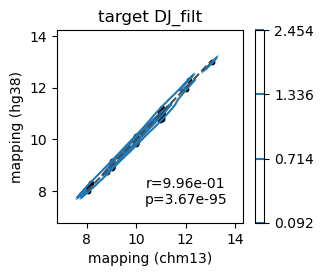

In [25]:
tg = 'DJ_filt'
df_flt = df.loc[df['tg'] == tg].dropna(subset=['count'])

x = 'DJ'
y = 'count'

label_mapping = {
    'Peak_Est': 'kmer',
    'count': 'mapping (hg38)',
    'DJ' : 'mapping (chm13)'
}

plt.figure(figsize=(3, 2.5))
ax = sns.kdeplot(data=df_flt, x=x, y=y, levels=4, common_norm=True)
ax.scatter(df_flt[x], df_flt[y], s=10, c='black', alpha=1)
ax.plot([8, 13], [8, 13], ls="--", c=".3")
ax.set_title(f"target {tg}")
ax.set_xlabel(label_mapping[x])
ax.set_ylabel(label_mapping[y])

r, p = pearsonr(df_flt[x], df_flt[y])
print(f"stat : {r}, pvalue : {p}")

ax.text(12, 8, f'r={r:.2e}', ha='center', va='bottom', fontsize=10)
ax.text(12, 7.4, f'p={p:.2e}', ha='center', va='bottom', fontsize=10)
    

plt.colorbar(ax.collections[0], ax=ax)
plt.savefig(f'../figures/RPC_{x}_vs_{y}_kdeplot.pdf', bbox_inches='tight')
plt.show()
plt.close()
